In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import seaborn as sns
import folium

In [2]:
df = pd.read_csv('/kaggle/input/extinction-of-a-species-data/extinct_species_dataset.csv')
df.head(3)

,Species Name,Years Lived (Million Years),Extinction Reason
0,Trilobite,337.75,Human Impact
1,Smilodon,311.57,Natural Disaster
2,Dodo,67.49,Mass Extinction


In [3]:
len(df)

1000000

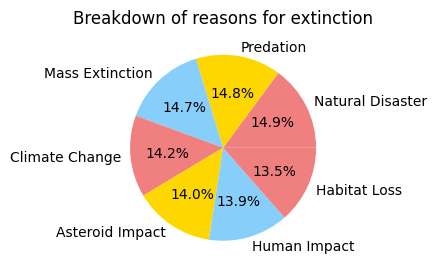

In [4]:
# Randomly sample 10,000 rows
df_sampled = df.sample(n=10000, random_state=42)

# Display the first 3 rows of the sampled dataset
df_sampled.head(3)
    # 生存年数の棒グラフ (各チャンクで処理する場合)
plt.figure(figsize=(3, 4))
extinction_reason_counts = df_sampled['Extinction Reason'].value_counts()
plt.pie(extinction_reason_counts, labels=extinction_reason_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'gold', 'lightskyblue'])
plt.title('Breakdown of reasons for extinction')
plt.show()

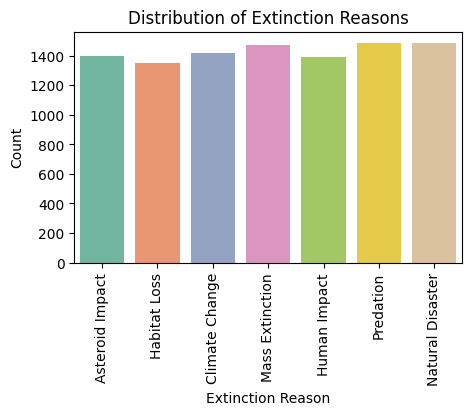

In [5]:
# Count plot for Extinction Reason
plt.figure(figsize=(5, 3))
sns.countplot(data=df_sampled, x='Extinction Reason', palette='Set2')
plt.xticks(rotation=90)
plt.xlabel('Extinction Reason')
plt.ylabel('Count')
plt.title('Distribution of Extinction Reasons')
plt.show()

In [6]:
# 簡単な集計を行う
agg_df = df.agg(["nunique", "unique", lambda x: x.isna().sum(), "dtypes"]).T

# "unique" 列の値を10個以下にする処理
agg_df['unique'] = agg_df['unique'].apply(lambda x: x if len(x) < 10 else x[:10])

# カラーマップを作成（ここではmatplotlibのカラーマップを使用）
colors = sns.color_palette("coolwarm", 10)

# 背景色を交互に設定する関数
def color_rows(s):
    return ['background-color: rgba({}, {}, {}, 0.5)'.format(int(colors[0][0]*255), 
                                                             int(colors[0][1]*255), 
                                                             int(colors[0][2]*255)) if i % 2 == 0 else 
            'background-color: rgba({}, {}, {}, 0.5)'.format(int(colors[5][0]*255), 
                                                             int(colors[5][1]*255), 
                                                             int(colors[5][2]*255)) for i in range(len(s))]

# DataFrameに色を適用
styled_df = agg_df.style.apply(color_rows, axis=1)

# 結果を表示
styled_df

,nunique,unique,,dtypes
Species Name,10,['Trilobite' 'Smilodon' 'Dodo' 'Woolly Mammoth' 'Tyrannosaurus Rex' 'Plesiosaur' 'Quagga' 'Megalodon' 'Steller’s Sea Cow' 'Sabertooth Tiger'],0,object
Years Lived (Million Years),49901,[337.75 311.57 67.49 89.81 395.72 44.99 334.35 42.87 264.58 54.16],0,float64
Extinction Reason,7,['Human Impact' 'Natural Disaster' 'Mass Extinction' 'Asteroid Impact' 'Climate Change' 'Predation' 'Habitat Loss'],0,object
